In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import urllib.parse
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn import tree

In [2]:
df_train = pd.read_csv('./Doceree_HCP_Train.csv',encoding='ISO-8859-1')
df_test = pd.read_csv('./Doceree_HCP_Test.csv',encoding='ISO-8859-1')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         107578 non-null  object 
 6   USERZIPCODE      109345 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 12.2+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28580 entries, 0 to 28579
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               28580 non-null  object 
 1   DEVICETYPE       28550 non-null  object 
 2   PLATFORM_ID      28530 non-null  float64
 3   BIDREQUESTIP     28530 non-null  object 
 4   USERPLATFORMUID  28530 non-null  object 
 5   USERCITY         26936 non-null  object 
 6   USERZIPCODE      27380 non-null  float64
 7   USERAGENT        28529 non-null  object 
 8   PLATFORMTYPE     28530 non-null  object 
 9   CHANNELTYPE      28530 non-null  object 
 10  URL              28530 non-null  object 
 11  KEYWORDS         28510 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.6+ MB


In [5]:
df_train.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [6]:
print("no. of rows: ",df_train.shape[0], "\n""no. of columns: ",df_train.shape[1])
print("no. of rows: ",df_test.shape[0], "\n""no. of columns: ",df_test.shape[1])

no. of rows:  113937 
no. of columns:  14
no. of rows:  28580 
no. of columns:  12


In [7]:
df_train.duplicated().sum()

0

In [8]:
df_test.duplicated().sum()
df_test.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
df_test.duplicated().sum()

0

In [10]:
df_test.isna().sum()

ID                    0
DEVICETYPE            8
PLATFORM_ID          17
BIDREQUESTIP         17
USERPLATFORMUID      17
USERCITY           1611
USERZIPCODE        1167
USERAGENT            18
PLATFORMTYPE         17
CHANNELTYPE          17
URL                  17
KEYWORDS             37
dtype: int64

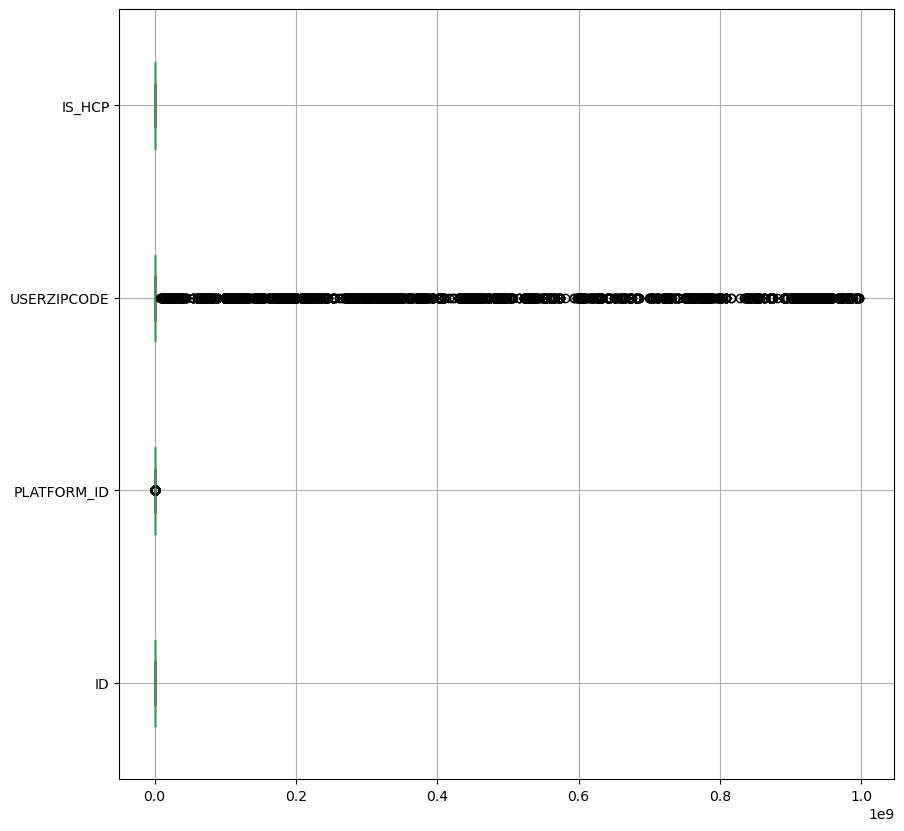

In [11]:
plt.figure(figsize=(10,10))
df_train.boxplot(vert=0)
plt.show()

<AxesSubplot:xlabel='DEVICETYPE', ylabel='IS_HCP'>

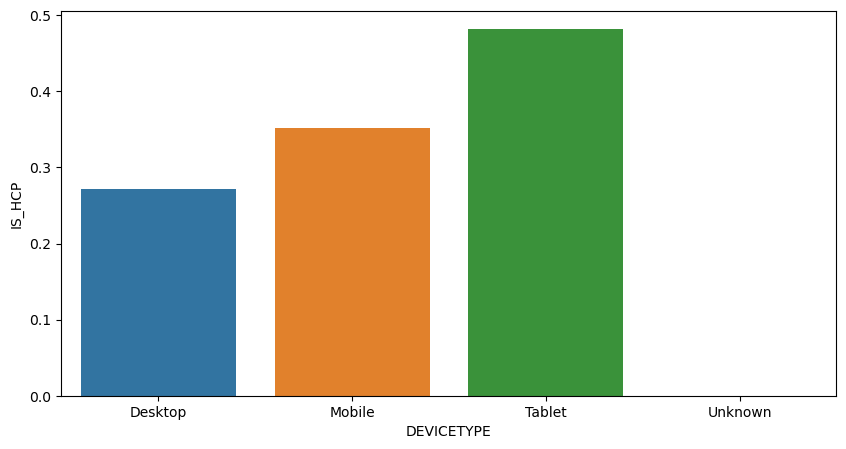

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(df_train.DEVICETYPE,df_train.IS_HCP,ci=None)

<AxesSubplot:xlabel='PLATFORM_ID', ylabel='IS_HCP'>

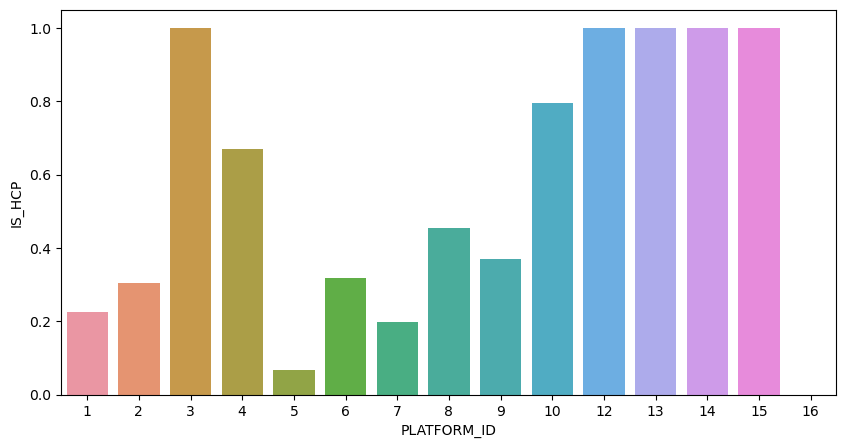

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(df_train.PLATFORM_ID,df_train.IS_HCP,ci=None)

<AxesSubplot:xlabel='CHANNELTYPE', ylabel='IS_HCP'>

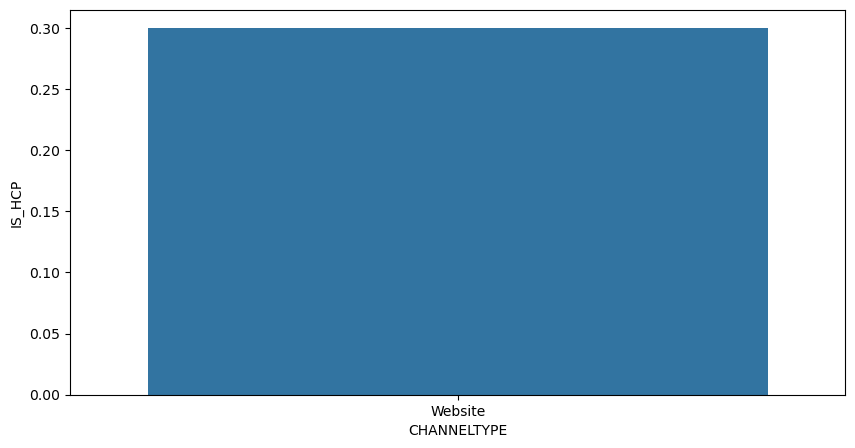

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(df_train.CHANNELTYPE,df_train.IS_HCP,ci=None)

In [15]:
df_test.dropna(subset=['URL'], inplace=True)
df_test['ID'] = df_test['ID'].astype(int)


In [16]:
# Function to convert IP address to numerical feature

def ip_to_numeric(ip):
    octets = ip.split('.')
    binary = ''.join([format(int(octet), '08b') for octet in octets])
    decimal = int(binary, 2)
    return decimal

# Apply the conversion function to the IP address column
df_train['BIDREQUESTIP'] = df_train['BIDREQUESTIP'].apply(ip_to_numeric)

# Print the updated dataframe
print(df_train)


            ID DEVICETYPE  PLATFORM_ID  BIDREQUESTIP  \
0         1001    Desktop            2    2863464470   
1         1002    Desktop            2    1104739609   
2         1003    Desktop            2    1122520854   
3         1004    Desktop            3    2302049782   
4         1005     Mobile            7    2932533091   
...        ...        ...          ...           ...   
113932  114933    Desktop            2    1146249598   
113933  114934    Desktop            2    1756105581   
113934  114935    Desktop            7    2920636017   
113935  114936     Mobile            2    1174241667   
113936  114937     Mobile            2    1814686127   

                             USERPLATFORMUID      USERCITY  USERZIPCODE  \
0       6974dcaa-f932-480e-9fb5-c52e20e1393a      Portland      97206.0   
1       c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf     Arlington      22202.0   
2       a698de4b-e200-46dd-b5fb-40402175ae18   New Meadows      83654.0   
3       45967533-75c8-4fbd-

In [17]:

# Function to convert IP address to numerical feature
def ip_to_numeric(ip):
    octets = ip.split('.')
    binary = ''.join([format(int(octet), '08b') for octet in octets])
    decimal = int(binary, 2)
    return decimal

# Apply the conversion function to the IP address column
df_test['BIDREQUESTIP'] = df_test['BIDREQUESTIP'].apply(ip_to_numeric)




In [18]:
cat=[]
num=[]
for i in df_train.columns:
    if df_train[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print('/n ')
print(num)


['DEVICETYPE', 'USERPLATFORMUID', 'USERCITY', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE', 'URL', 'KEYWORDS', 'TAXONOMY']
/n 
['ID', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERZIPCODE', 'IS_HCP']


In [19]:
cat_test=[]
num_test=[]
for i in df_test.columns:
    if df_test[i].dtype=="object":
        cat_test.append(i)
    else:
        num_test.append(i)
print(cat_test) 
print('/n ')
print(num_test)


['DEVICETYPE', 'USERPLATFORMUID', 'USERCITY', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE', 'URL', 'KEYWORDS']
/n 
['ID', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERZIPCODE']


In [20]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        print(column.upper(),': ',df_train[column].nunique())
        print(df_train[column].value_counts().sort_values())
        print('\n')

DEVICETYPE :  4
Unknown       24
Tablet      3425
Mobile     32065
Desktop    78423
Name: DEVICETYPE, dtype: int64


USERPLATFORMUID :  53780
ce1e65a6-0d27-448d-b65c-3dc95c4fee4b       1
9fd00368-515b-4740-a23a-562c827b72fe       1
c19cdfe3-a995-4df2-b257-37371c17f868       1
7bd6ecee-4766-4400-9842-ef627fb1adec       1
9d327b4c-bfd7-4980-a10a-2ac6d22502c3       1
                                        ... 
fe53f32c-4646-4abe-afea-90b21d6b8531     617
fcd3d327-0ad5-425e-8ea8-33ffe6a31543     629
d00f28d6-3a50-46cd-92f3-8601bd57ad0e     675
d76f7c0b-1a64-4d4b-b36d-86c832be8837    1406
3e2578c8-f794-41af-a38c-c5cfb3c0f014    1447
Name: USERPLATFORMUID, Length: 53780, dtype: int64


USERCITY :  4420
Gambier            1
Dillsboro          1
Hawkinsville       1
Ellsworth          1
Wendell            1
                ... 
Houston         1747
Los Angeles     2154
St Louis        2545
Brooklyn        3237
New York        4943
Name: USERCITY, Length: 4420, dtype: int64


USERAGENT :  4288

KEYWORDS :  2460
the|lung|educational|pneumonia|radiology|pulmonary fibrosis|dyspnea|technology|pleural effusion|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1
small|nephrology|radiology|preventive 

In [21]:
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        print(column.upper(),': ',df_test[column].nunique())
        print(df_test[column].value_counts().sort_values())
        print('\n')

DEVICETYPE :  4
Unknown        6
Tablet       810
Mobile      7946
Desktop    19768
Name: DEVICETYPE, dtype: int64


USERPLATFORMUID :  18040
e7709c86-83eb-4961-a1b3-67be0f176a22      1
8affaba4-9d61-4ee6-b297-b5e1b5f97edc      1
b5294e22-a94a-415a-a143-afffd319a42e      1
49adafe2-f3e5-48be-a632-71c373ff7fc4      1
015a8255-0688-47f5-a6b2-184d636a84a9      1
                                       ... 
fa24a307-1001-4f5e-9d87-669e91737c07    144
fe53f32c-4646-4abe-afea-90b21d6b8531    146
d00f28d6-3a50-46cd-92f3-8601bd57ad0e    169
d76f7c0b-1a64-4d4b-b36d-86c832be8837    344
3e2578c8-f794-41af-a38c-c5cfb3c0f014    360
Name: USERPLATFORMUID, Length: 18040, dtype: int64


USERCITY :  3060
Horsham           1
Mulberry          1
Foreston          1
Westtown          1
Clemson           1
               ... 
Houston         417
Los Angeles     575
St Louis        665
Brooklyn        801
New York       1204
Name: USERCITY, Length: 3060, dtype: int64


USERAGENT :  2379
Mozilla/5.0 (Linux; A

In [22]:
dups=df_train.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))

Total no of duplicate values = 0


In [23]:
impute_train=['DEVICETYPE', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERCITY', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE', 'URL', 'KEYWORDS', 'TAXONOMY']
impute_test= ['DEVICETYPE', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERCITY', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE', 'URL', 'KEYWORDS']

In [24]:
for i in impute_train:
    df_train[i].fillna(df_train[i].mode(),inplace=True)

In [25]:
for i in impute_test:
     df_test[i].fillna(df_test[i].mode(),inplace=True)

In [26]:
df_train.isnull().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE         4592
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81623
IS_HCP                 1
dtype: int64

In [27]:
df_test.isnull().sum()

ID                    0
DEVICETYPE            0
PLATFORM_ID           0
BIDREQUESTIP          0
USERPLATFORMUID       0
USERCITY           1594
USERZIPCODE        1150
USERAGENT             1
PLATFORMTYPE          0
CHANNELTYPE           0
URL                   0
KEYWORDS             20
dtype: int64

In [28]:

# Function to convert URL into numeric representations
def url_to_numeric(url):
    parsed_url = urllib.parse.urlparse(url)
    protocol_numeric = int(parsed_url.scheme == 'https')
    domain_numeric = hash(parsed_url.netloc) % 1000
    path_length_numeric = len(parsed_url.path)
    query_exists_numeric = int(bool(parsed_url.query))
    return protocol_numeric, domain_numeric, path_length_numeric, query_exists_numeric

# Apply the conversion function to the URL column
df_train[['Protocol', 'Domain', 'Path Length', 'Query Exists']]= df_train['URL'].apply(url_to_numeric).apply(pd.Series)


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  int64  
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         107578 non-null  object 
 6   USERZIPCODE      109345 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32314 non-null   object 
 13  IS_HCP           113936 non-null  float64
 14  Protocol         113937 non-null  int64  
 15  Domain           113937 non-null  int64  
 16  Path Length      113937 non-null  int6

In [30]:

# Function to convert URL into numeric representations
def url_to_numeric(url):
    parsed_url = urllib.parse.urlparse(url)
    protocol_numeric = int(parsed_url.scheme == 'https')
    domain_numeric = hash(parsed_url.netloc) % 1000
    path_length_numeric = len(parsed_url.path)
    query_exists_numeric = int(bool(parsed_url.query))
    return protocol_numeric, domain_numeric, path_length_numeric, query_exists_numeric

# Apply the conversion function to the URL column
df_test[['Protocol', 'Domain', 'Path Length', 'Query Exists']]= df_test['URL'].apply(url_to_numeric).apply(pd.Series)

# Print the updated DataFrame
print(df_train)


            ID DEVICETYPE  PLATFORM_ID  BIDREQUESTIP  \
0         1001    Desktop            2    2863464470   
1         1002    Desktop            2    1104739609   
2         1003    Desktop            2    1122520854   
3         1004    Desktop            3    2302049782   
4         1005     Mobile            7    2932533091   
...        ...        ...          ...           ...   
113932  114933    Desktop            2    1146249598   
113933  114934    Desktop            2    1756105581   
113934  114935    Desktop            7    2920636017   
113935  114936     Mobile            2    1174241667   
113936  114937     Mobile            2    1814686127   

                             USERPLATFORMUID      USERCITY  USERZIPCODE  \
0       6974dcaa-f932-480e-9fb5-c52e20e1393a      Portland      97206.0   
1       c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf     Arlington      22202.0   
2       a698de4b-e200-46dd-b5fb-40402175ae18   New Meadows      83654.0   
3       45967533-75c8-4fbd-

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28530 entries, 0 to 28546
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               28530 non-null  int32  
 1   DEVICETYPE       28530 non-null  object 
 2   PLATFORM_ID      28530 non-null  float64
 3   BIDREQUESTIP     28530 non-null  int64  
 4   USERPLATFORMUID  28530 non-null  object 
 5   USERCITY         26936 non-null  object 
 6   USERZIPCODE      27380 non-null  float64
 7   USERAGENT        28529 non-null  object 
 8   PLATFORMTYPE     28530 non-null  object 
 9   CHANNELTYPE      28530 non-null  object 
 10  URL              28530 non-null  object 
 11  KEYWORDS         28510 non-null  object 
 12  Protocol         28530 non-null  int64  
 13  Domain           28530 non-null  int64  
 14  Path Length      28530 non-null  int64  
 15  Query Exists     28530 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(8)
memory usage:

In [32]:
df_train.isnull().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE         4592
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81623
IS_HCP                 1
Protocol               0
Domain                 0
Path Length            0
Query Exists           0
dtype: int64

In [33]:
df_test.isnull().sum()

ID                    0
DEVICETYPE            0
PLATFORM_ID           0
BIDREQUESTIP          0
USERPLATFORMUID       0
USERCITY           1594
USERZIPCODE        1150
USERAGENT             1
PLATFORMTYPE          0
CHANNELTYPE           0
URL                   0
KEYWORDS             20
Protocol              0
Domain                0
Path Length           0
Query Exists          0
dtype: int64

In [34]:
df_test.shape

(28530, 16)

In [35]:
# Define keywords
keywords = ['healthcare','doctor','medicine','patient care','Health Care Professional','Health Services','Physicians']

# Create binary features for each keyword
for keyword in keywords:
    df_train[keyword] = np.where(df_train['KEYWORDS'].str.contains(keyword, case=False), 1, 0)

# Print the updated DataFrame
print(df_train)


            ID DEVICETYPE  PLATFORM_ID  BIDREQUESTIP  \
0         1001    Desktop            2    2863464470   
1         1002    Desktop            2    1104739609   
2         1003    Desktop            2    1122520854   
3         1004    Desktop            3    2302049782   
4         1005     Mobile            7    2932533091   
...        ...        ...          ...           ...   
113932  114933    Desktop            2    1146249598   
113933  114934    Desktop            2    1756105581   
113934  114935    Desktop            7    2920636017   
113935  114936     Mobile            2    1174241667   
113936  114937     Mobile            2    1814686127   

                             USERPLATFORMUID      USERCITY  USERZIPCODE  \
0       6974dcaa-f932-480e-9fb5-c52e20e1393a      Portland      97206.0   
1       c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf     Arlington      22202.0   
2       a698de4b-e200-46dd-b5fb-40402175ae18   New Meadows      83654.0   
3       45967533-75c8-4fbd-

In [36]:
# Define keywords
keywords = ['healthcare','doctor','medicine','patient care','Health Care Professional','Health Services','Physicians']

# Create binary features for each keyword
for keyword in keywords:
    df_test[keyword] = np.where(df_test['KEYWORDS'].str.contains(keyword, case=False), 1, 0)

# Print the updated DataFrame
print(df_test)


           ID DEVICETYPE  PLATFORM_ID  BIDREQUESTIP  \
0      115501    Desktop          2.0    1270736743   
1      115502     Mobile          2.0     409280926   
2      115503    Desktop          2.0    2893469838   
3      115504    Desktop          7.0    1198094507   
4      115505    Desktop          2.0    1230164809   
...       ...        ...          ...           ...   
28542  144026    Desktop          2.0    1170926065   
28543  144027    Desktop          7.0    1258602049   
28544  144028    Desktop          7.0    2301932589   
28545  144029    Desktop          8.0    1123631620   
28546  144030    Desktop          2.0    1807884693   

                            USERPLATFORMUID         USERCITY  USERZIPCODE  \
0      0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4     Fayetteville      28305.0   
1      c8396dd0-969f-4d99-a40b-b7bb1f516154    Conneaut Lake      16316.0   
2      3c97a081-6518-43f8-9f26-369759cfb471           Covina      91724.0   
3      3e2578c8-f794-41af-a38c-

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28530 entries, 0 to 28546
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        28530 non-null  int32  
 1   DEVICETYPE                28530 non-null  object 
 2   PLATFORM_ID               28530 non-null  float64
 3   BIDREQUESTIP              28530 non-null  int64  
 4   USERPLATFORMUID           28530 non-null  object 
 5   USERCITY                  26936 non-null  object 
 6   USERZIPCODE               27380 non-null  float64
 7   USERAGENT                 28529 non-null  object 
 8   PLATFORMTYPE              28530 non-null  object 
 9   CHANNELTYPE               28530 non-null  object 
 10  URL                       28530 non-null  object 
 11  KEYWORDS                  28510 non-null  object 
 12  Protocol                  28530 non-null  int64  
 13  Domain                    28530 non-null  int64  
 14  Path L

In [38]:

df_train.drop('URL',axis=1,inplace=True)
df_test.drop('URL',axis=1,inplace=True)

df_train.dropna(subset=['USERCITY'],inplace=True)
df_test.dropna(subset=['USERCITY'],inplace=True)


df_train.drop('KEYWORDS',axis=1,inplace=True)
df_test.drop('KEYWORDS',axis=1,inplace=True)

df_train.dropna(subset=['USERZIPCODE'],inplace=True)
df_test.dropna(subset=['USERZIPCODE'],inplace=True)

df_train.dropna(subset=['IS_HCP'],inplace=True)


df_train.drop('TAXONOMY',axis=1,inplace=True)



df_train.drop('USERPLATFORMUID',axis=1,inplace=True)
df_test.drop('USERPLATFORMUID',axis=1,inplace=True)


df_train.drop('PLATFORM_ID',axis=1,inplace=True)
df_test.drop('PLATFORM_ID',axis=1,inplace=True)

df_train.drop('CHANNELTYPE',axis=1,inplace=True)
df_test.drop('CHANNELTYPE',axis=1,inplace=True)

In [39]:
df_train.drop('USERAGENT',axis=1,inplace=True)
df_test.drop('USERAGENT',axis=1,inplace=True)
df_train.drop('USERCITY',axis=1,inplace=True)
df_test.drop('USERCITY',axis=1,inplace=True)

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107575 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        107575 non-null  int64  
 1   DEVICETYPE                107575 non-null  object 
 2   BIDREQUESTIP              107575 non-null  int64  
 3   USERZIPCODE               107575 non-null  float64
 4   PLATFORMTYPE              107575 non-null  object 
 5   IS_HCP                    107575 non-null  float64
 6   Protocol                  107575 non-null  int64  
 7   Domain                    107575 non-null  int64  
 8   Path Length               107575 non-null  int64  
 9   Query Exists              107575 non-null  int64  
 10  healthcare                107575 non-null  int32  
 11  doctor                    107575 non-null  int32  
 12  medicine                  107575 non-null  int32  
 13  patient care              107575 non-null  i

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26936 entries, 0 to 28546
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        26936 non-null  int32  
 1   DEVICETYPE                26936 non-null  object 
 2   BIDREQUESTIP              26936 non-null  int64  
 3   USERZIPCODE               26936 non-null  float64
 4   PLATFORMTYPE              26936 non-null  object 
 5   Protocol                  26936 non-null  int64  
 6   Domain                    26936 non-null  int64  
 7   Path Length               26936 non-null  int64  
 8   Query Exists              26936 non-null  int64  
 9   healthcare                26936 non-null  int32  
 10  doctor                    26936 non-null  int32  
 11  medicine                  26936 non-null  int32  
 12  patient care              26936 non-null  int32  
 13  Health Care Professional  26936 non-null  int32  
 14  Health

### Dropping unnecessary columns

In [42]:
df_train.drop('ID',axis=1,inplace=True)

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107575 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DEVICETYPE                107575 non-null  object 
 1   BIDREQUESTIP              107575 non-null  int64  
 2   USERZIPCODE               107575 non-null  float64
 3   PLATFORMTYPE              107575 non-null  object 
 4   IS_HCP                    107575 non-null  float64
 5   Protocol                  107575 non-null  int64  
 6   Domain                    107575 non-null  int64  
 7   Path Length               107575 non-null  int64  
 8   Query Exists              107575 non-null  int64  
 9   healthcare                107575 non-null  int32  
 10  doctor                    107575 non-null  int32  
 11  medicine                  107575 non-null  int32  
 12  patient care              107575 non-null  int32  
 13  Health Care Professional  107575 non-null  i

### Encoding Categorical values

In [44]:
df_train = pd.get_dummies(df_train,drop_first = True)
df_train.head()

,BIDREQUESTIP,USERZIPCODE,IS_HCP,Protocol,Domain,Path Length,Query Exists,healthcare,doctor,medicine,patient care,Health Care Professional,Health Services,Physicians,DEVICETYPE_Mobile,DEVICETYPE_Tablet,DEVICETYPE_Unknown,PLATFORMTYPE_Medical News Platform,PLATFORMTYPE_Online Learning Portal,PLATFORMTYPE_Online Medical Journal
0,2863464470,97206.0,0.0,1,816,36,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,1104739609,22202.0,0.0,1,816,69,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1122520854,83654.0,0.0,1,816,36,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,2932533091,77008.0,0.0,1,301,90,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,406561774,13215.0,0.0,1,301,84,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [45]:
for column in df_train.columns:
    if df_train[column].dtype == 'uint8':
        print(column.upper(),': ',df_train[column].nunique())
        print(df_train[column].value_counts().sort_values())
        print('\n')

DEVICETYPE_MOBILE :  2
1    30364
0    77211
Name: DEVICETYPE_Mobile, dtype: int64


DEVICETYPE_TABLET :  2
1      3324
0    104251
Name: DEVICETYPE_Tablet, dtype: int64


DEVICETYPE_UNKNOWN :  2
1        19
0    107556
Name: DEVICETYPE_Unknown, dtype: int64


PLATFORMTYPE_MEDICAL NEWS PLATFORM :  2
1       798
0    106777
Name: PLATFORMTYPE_Medical News Platform, dtype: int64


PLATFORMTYPE_ONLINE LEARNING PORTAL :  2
1      2748
0    104827
Name: PLATFORMTYPE_Online Learning Portal, dtype: int64


PLATFORMTYPE_ONLINE MEDICAL JOURNAL :  2
0      3586
1    103989
Name: PLATFORMTYPE_Online Medical Journal, dtype: int64




In [46]:
df_train.shape

(107575, 20)

In [47]:
test_file_ids = df_test['ID']
df_test.drop("ID",axis=1,inplace=True)
df_test

,DEVICETYPE,BIDREQUESTIP,USERZIPCODE,PLATFORMTYPE,Protocol,Domain,Path Length,Query Exists,healthcare,doctor,medicine,patient care,Health Care Professional,Health Services,Physicians
0,Desktop,1270736743,28305.0,Online Medical Journal,1,51,107,0,0,0,1,0,0,0,0
1,Mobile,409280926,16316.0,Online Medical Journal,1,903,68,0,0,0,1,0,0,0,0
2,Desktop,2893469838,91724.0,Online Medical Journal,1,816,30,0,0,0,1,0,0,0,0
3,Desktop,1198094507,11226.0,Online Medical Journal,1,301,53,0,0,0,1,0,0,0,0
4,Desktop,1230164809,30062.0,Online Medical Journal,1,767,93,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28541,Mobile,1169519402,95404.0,Online Medical Journal,1,301,76,0,0,0,1,0,0,0,0
28542,Desktop,1170926065,11215.0,Online Medical Journal,1,767,93,0,0,0,1,0,0,0,0
28543,Desktop,1258602049,33178.0,Online Medical Journal,1,301,40,0,0,0,1,0,0,0,0
28544,Desktop,2301932589,33314.0,Online Medical Journal,1,301,23,1,0,0,1,0,0,0,0


In [48]:
for column in df_test.columns:
    if df_test[column].dtype == 'uint8':
        print(column.upper(),': ',df_test[column].nunique())
        print(df_test[column].value_counts().sort_values())
        print('\n')

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26936 entries, 0 to 28546
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEVICETYPE                26936 non-null  object 
 1   BIDREQUESTIP              26936 non-null  int64  
 2   USERZIPCODE               26936 non-null  float64
 3   PLATFORMTYPE              26936 non-null  object 
 4   Protocol                  26936 non-null  int64  
 5   Domain                    26936 non-null  int64  
 6   Path Length               26936 non-null  int64  
 7   Query Exists              26936 non-null  int64  
 8   healthcare                26936 non-null  int32  
 9   doctor                    26936 non-null  int32  
 10  medicine                  26936 non-null  int32  
 11  patient care              26936 non-null  int32  
 12  Health Care Professional  26936 non-null  int32  
 13  Health Services           26936 non-null  int32  
 14  Physic

In [50]:
df_test = pd.get_dummies(df_test,drop_first = True)
df_test.shape

(26936, 19)

In [51]:
for column in df_test.columns:
    if df_test[column].dtype == 'uint8':
        print(column.upper(),': ',df_test[column].nunique())
        print(df_test[column].value_counts().sort_values())
        print('\n')

DEVICETYPE_MOBILE :  2
1     7529
0    19407
Name: DEVICETYPE_Mobile, dtype: int64


DEVICETYPE_TABLET :  2
1      782
0    26154
Name: DEVICETYPE_Tablet, dtype: int64


DEVICETYPE_UNKNOWN :  2
1        6
0    26930
Name: DEVICETYPE_Unknown, dtype: int64


PLATFORMTYPE_MEDICAL NEWS PLATFORM :  2
1      191
0    26745
Name: PLATFORMTYPE_Medical News Platform, dtype: int64


PLATFORMTYPE_ONLINE LEARNING PORTAL :  2
1      699
0    26237
Name: PLATFORMTYPE_Online Learning Portal, dtype: int64


PLATFORMTYPE_ONLINE MEDICAL JOURNAL :  2
0      897
1    26039
Name: PLATFORMTYPE_Online Medical Journal, dtype: int64




In [52]:
df_test.shape

(26936, 19)

### Splitting training dataset into train and validation set

In [53]:
X = df_train.drop(['IS_HCP'],axis = 1)
y = df_train['IS_HCP']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train,y_validation = train_test_split(X,y,test_size = 0.2,random_state = 0)

### Model training - Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=0)
dt_model.fit(X_train,y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_val = dt_model.predict(X_validation)

In [56]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y_train,y_pred_train)
dt_acc_val = metrics.accuracy_score(y_validation,y_pred_val)
print("Train Accuracy:",dt_acc_train)
print("Validation Accuracy:",dt_acc_val)
print()

dt_roc_train = metrics.roc_auc_score(y_train,y_pred_train)
dt_roc_val = metrics.roc_auc_score(y_validation,y_pred_val)
print("Train ROC AUC score:",dt_roc_train)
print("Validation ROC AUC score:",dt_roc_val)
print()

dt_clr_train = metrics.classification_report(y_train,y_pred_train)
dt_clr_val = metrics.classification_report(y_validation,y_pred_val)
print("Train Classification Report:\n",dt_clr_train)
print("Validation Classification Report:\n",dt_clr_val)

Train Accuracy: 0.8784336509412038
Validation Accuracy: 0.8778061817336742

Train ROC AUC score: 0.8141158668016175
Validation ROC AUC score: 0.8129062246025499

Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     60192
         1.0       0.92      0.65      0.76     25868

    accuracy                           0.88     86060
   macro avg       0.89      0.81      0.84     86060
weighted avg       0.88      0.88      0.87     86060

Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     15025
         1.0       0.92      0.65      0.76      6490

    accuracy                           0.88     21515
   macro avg       0.89      0.81      0.84     21515
weighted avg       0.88      0.88      0.87     21515



In [57]:
#Tuning the DT model
#Create a decision tree classifier
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


dtcl =  DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dtcl, param_grid = param_grid,n_jobs=-1, cv = 5)

grid_search_dt.fit(X_train, y_train)

dt_model = grid_search_dt.best_estimator_
y_pred_train = dt_model.predict(X_train)
y_pred_val = dt_model.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred_val)
print("Accuracy:", accuracy)

Accuracy: 0.9879618870555427


In [58]:
dtcl.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [60]:
# Create a bagging classifier with a decision tree base model
from sklearn.ensemble import BaggingClassifier
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_model)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Test the model and generate predictions
y_pred = bagging_model.predict(X_validation)

# Evaluate the model's performance
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9870323030443876


In [61]:
#Bagging Train
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [62]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9998373227980478
[[60192     0]
 [   14 25854]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60192
         1.0       1.00      1.00      1.00     25868

    accuracy                           1.00     86060
   macro avg       1.00      1.00      1.00     86060
weighted avg       1.00      1.00      1.00     86060



In [63]:
# Bagging Test
y_validation_predict=Bagging_model.predict(X_validation)
Bagging_model_score=Bagging_model.score(X_validation,y_validation)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_validation,y_validation_predict))
print(metrics.classification_report(y_validation,y_validation_predict))

0.9891238670694864
[[14945    80]
 [  154  6336]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15025
         1.0       0.99      0.98      0.98      6490

    accuracy                           0.99     21515
   macro avg       0.99      0.99      0.99     21515
weighted avg       0.99      0.99      0.99     21515



### Model training - Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=10,random_state=0)
rf_model.fit(X_train,y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_val_rf = rf_model.predict(X_validation)

In [65]:
from sklearn import metrics
rf_acc_train = metrics.accuracy_score(y_train,y_pred_train_rf)
rf_acc_val = metrics.accuracy_score(y_validation,y_pred_val_rf)
print("Train Accuracy:",rf_acc_train)
print("Validation Accuracy:",rf_acc_val)
print()

rf_roc_train = metrics.roc_auc_score(y_train,y_pred_train_rf)
rf_roc_val = metrics.roc_auc_score(y_validation,y_pred_val_rf)
print("Train ROC AUC score:",rf_roc_train)
print("Validation ROC AUC score:",rf_roc_val)
print()

rf_clr_train = metrics.classification_report(y_train,y_pred_train_rf)
rf_clr_val = metrics.classification_report(y_validation,y_pred_val_rf)
print("Train Classification Report:\n",rf_clr_train)
print("Validation Classification Report:\n",rf_clr_val)

Train Accuracy: 0.8480711131768534
Validation Accuracy: 0.8454101789449221

Train ROC AUC score: 0.7546263982984978
Validation ROC AUC score: 0.7522935579888682

Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90     60192
         1.0       0.95      0.52      0.67     25868

    accuracy                           0.85     86060
   macro avg       0.89      0.75      0.79     86060
weighted avg       0.87      0.85      0.83     86060

Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90     15025
         1.0       0.95      0.52      0.67      6490

    accuracy                           0.85     21515
   macro avg       0.89      0.75      0.78     21515
weighted avg       0.86      0.85      0.83     21515



In [66]:
#Hyperparameter tuning


In [67]:
param_grid = {
    'max_depth': [20],
    'max_features': [19],
    'min_samples_leaf': [50],
    'min_samples_split': [50],
    'n_estimators': [200]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid,n_jobs=-1, cv = 5)

In [68]:
grid_search_rfcl.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': [19],
                         'min_samples_leaf': [50], 'min_samples_split': [50],
                         'n_estimators': [200]})

In [69]:
rf_model = grid_search_rfcl.best_estimator_

In [70]:
y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_validation)

In [71]:
from sklearn import metrics
rf_acc_train = metrics.accuracy_score(y_train,y_pred_train)
rf_acc_val = metrics.accuracy_score(y_validation,y_pred_val)
print("Train Accuracy:",rf_acc_train)
print("Validation Accuracy:",rf_acc_val)
print()

rf_roc_train = metrics.roc_auc_score(y_train,y_pred_train)
rf_roc_val = metrics.roc_auc_score(y_validation,y_pred_val)
print("Train ROC AUC score:",rf_roc_train)
print("Validation ROC AUC score:",rf_roc_val)
print()

rf_clr_train = metrics.classification_report(y_train,y_pred_train)
rf_clr_val = metrics.classification_report(y_validation,y_pred_val)
print("Train Classification Report:\n",rf_clr_train)
print("Validation Classification Report:\n",rf_clr_val)

Train Accuracy: 0.936033000232396
Validation Accuracy: 0.9350685568208227

Train ROC AUC score: 0.9144262636661801
Validation ROC AUC score: 0.914517329873939

Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     60192
         1.0       0.92      0.86      0.89     25868

    accuracy                           0.94     86060
   macro avg       0.93      0.91      0.92     86060
weighted avg       0.94      0.94      0.94     86060

Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     15025
         1.0       0.92      0.86      0.89      6490

    accuracy                           0.94     21515
   macro avg       0.93      0.91      0.92     21515
weighted avg       0.93      0.94      0.93     21515



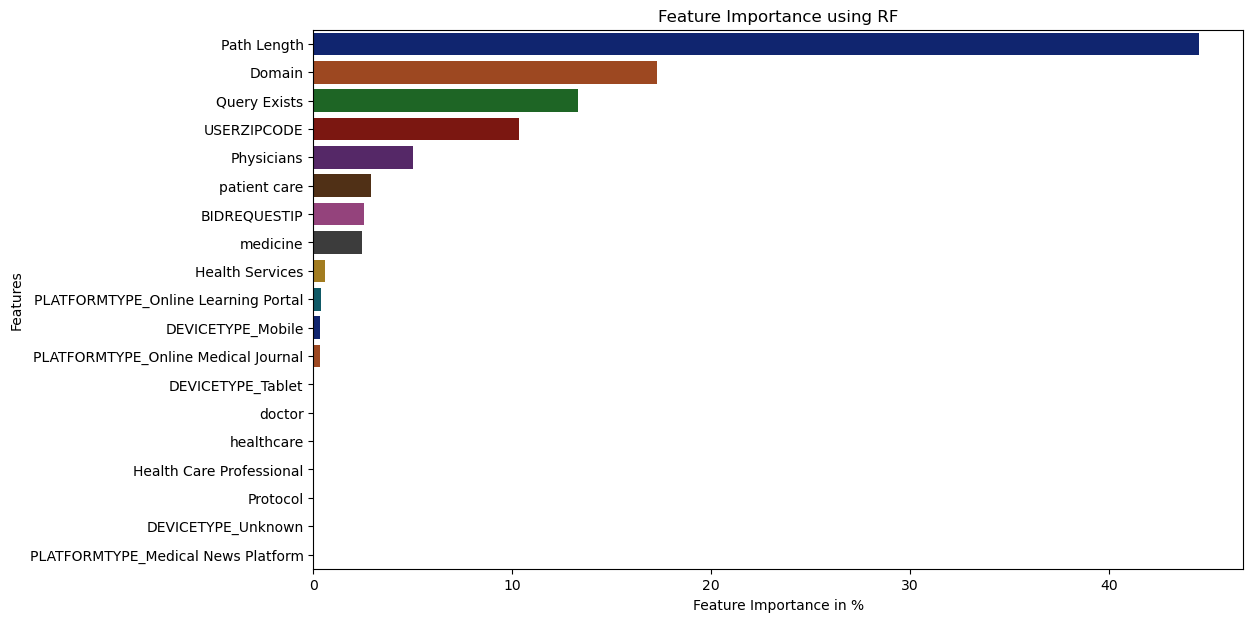

In [72]:
x=pd.DataFrame(rf_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [73]:
df_train1=df_train.copy()
df_test1=df_test.copy()

In [74]:
df_train1.head()

,BIDREQUESTIP,USERZIPCODE,IS_HCP,Protocol,Domain,Path Length,Query Exists,healthcare,doctor,medicine,patient care,Health Care Professional,Health Services,Physicians,DEVICETYPE_Mobile,DEVICETYPE_Tablet,DEVICETYPE_Unknown,PLATFORMTYPE_Medical News Platform,PLATFORMTYPE_Online Learning Portal,PLATFORMTYPE_Online Medical Journal
0,2863464470,97206.0,0.0,1,816,36,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,1104739609,22202.0,0.0,1,816,69,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1122520854,83654.0,0.0,1,816,36,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,2932533091,77008.0,0.0,1,301,90,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,406561774,13215.0,0.0,1,301,84,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [75]:
df_train1.columns

Index(['BIDREQUESTIP', 'USERZIPCODE', 'IS_HCP', 'Protocol', 'Domain',
       'Path Length', 'Query Exists', 'healthcare', 'doctor', 'medicine',
       'patient care', 'Health Care Professional', 'Health Services',
       'Physicians', 'DEVICETYPE_Mobile', 'DEVICETYPE_Tablet',
       'DEVICETYPE_Unknown', 'PLATFORMTYPE_Medical News Platform',
       'PLATFORMTYPE_Online Learning Portal',
       'PLATFORMTYPE_Online Medical Journal'],
      dtype='object')

In [76]:
df_test1.columns

Index(['BIDREQUESTIP', 'USERZIPCODE', 'Protocol', 'Domain', 'Path Length',
       'Query Exists', 'healthcare', 'doctor', 'medicine', 'patient care',
       'Health Care Professional', 'Health Services', 'Physicians',
       'DEVICETYPE_Mobile', 'DEVICETYPE_Tablet', 'DEVICETYPE_Unknown',
       'PLATFORMTYPE_Medical News Platform',
       'PLATFORMTYPE_Online Learning Portal',
       'PLATFORMTYPE_Online Medical Journal'],
      dtype='object')

In [77]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [78]:
X1 = df_train1.drop(['IS_HCP'],axis = 1)
y1 = df_train1['IS_HCP']

In [79]:
X1.shape

(107575, 19)

In [80]:
from sklearn.model_selection import train_test_split
X1_train, X1_validation, y1_train, y1_validation = train_test_split(X1,y1,test_size = 0.2,random_state = 0)

In [81]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [38],
    'max_features': [16],
    'min_samples_leaf': [5],
    'min_samples_split': [14],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid,n_jobs=-1, cv = 5)

In [82]:
grid_search_rfcl.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [38],
                         'max_features': [16], 'min_samples_leaf': [5],
                         'min_samples_split': [14], 'n_estimators': [100]})

In [83]:
grid_search_rfcl.best_params_

{'criterion': 'entropy',
 'max_depth': 38,
 'max_features': 16,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 100}

In [84]:
rf_model1 = grid_search_rfcl.best_estimator_

In [85]:
y_pred_train = rf_model1.predict(X1_train)
y_pred_val = rf_model1.predict(X1_validation)

In [86]:
from sklearn import metrics
rf_acc_train = metrics.accuracy_score(y1_train,y_pred_train)
rf_acc_val = metrics.accuracy_score(y_validation,y_pred_val)
print("Train Accuracy:",rf_acc_train)
print("Validation Accuracy:",rf_acc_val)
print()

rf_roc_train = metrics.roc_auc_score(y1_train,y_pred_train)
rf_roc_val = metrics.roc_auc_score(y_validation,y_pred_val)
print("Train ROC AUC score:",rf_roc_train)
print("Validation ROC AUC score:",rf_roc_val)
print()

rf_clr_train = metrics.classification_report(y1_train,y_pred_train)
rf_clr_val = metrics.classification_report(y_validation,y_pred_val)
print("Train Classification Report:\n",rf_clr_train)
print("Validation Classification Report:\n",rf_clr_val)

Train Accuracy: 0.9878805484545666
Validation Accuracy: 0.9800139437601674

Train ROC AUC score: 0.9833229557380713
Validation ROC AUC score: 0.972911505990273

Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     60192
         1.0       0.99      0.97      0.98     25868

    accuracy                           0.99     86060
   macro avg       0.99      0.98      0.99     86060
weighted avg       0.99      0.99      0.99     86060

Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     15025
         1.0       0.98      0.96      0.97      6490

    accuracy                           0.98     21515
   macro avg       0.98      0.97      0.98     21515
weighted avg       0.98      0.98      0.98     21515



In [87]:
#after hypertuning
models = {"Random Forest": RandomForestClassifier()}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_validation)
    accuracy = accuracy_score(y1_validation, y1_pred)
    print(f"{model_name} accuracy: {accuracy}")


Random Forest accuracy: 0.9836393214036718


In [88]:
df2=pd.DataFrame(rf_model1.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
df2

,0
Path Length,46.357970
Domain,16.949288
USERZIPCODE,12.050835
Query Exists,8.223195
BIDREQUESTIP,5.755623
Physicians,4.030511
patient care,1.929102
medicine,1.893918
DEVICETYPE_Mobile,0.811613
Health Services,0.714884


In [112]:
final_predictions = dt_model.predict(df_test)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "IS_HCP"},inplace=True)
submission.to_csv('Output_File_dt.csv',index = False)

In [90]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - 
!pip install xgboost 
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [91]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [92]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_validation)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_validation,y_validation)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_validation,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_validation,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        

    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_validation,y_validation))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_validation,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_validation,pred_test))
    
    return score_list

In [93]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8213688124564258
Accuracy on test set :  0.8203114106437369
Recall on training set :  0.5112494201329828
Recall on test set :  0.5083204930662558
Precision on training set :  0.8288937637104355
Precision on test set :  0.8301459486663312


In [94]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [95]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8628747385544968
Accuracy on test set :  0.8620497327445968
Recall on training set :  0.5927787227462502
Recall on test set :  0.5929121725731895
Precision on training set :  0.923679296427926
Precision on test set :  0.9218974604695735


In [96]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [97]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb) 

Accuracy on training set :  0.9705321868463862
Accuracy on test set :  0.9647687659772252
Recall on training set :  0.9264342044224525
Recall on test set :  0.9152542372881356
Precision on training set :  0.9742662005041061
Precision on test set :  0.9661678594664932


In [98]:
#final_predictions = xgb.predict(df_test)
#submission=pd.DataFrame([test_file_ids,final_predictions]).T
#submission.rename(columns={"is_hcp": "IS_HCP"},inplace=True)
#submission.to_csv('Submit_new_xgb1.csv',index = False)

In [99]:
### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()

In [100]:
LDA_model=model.fit(X_train,y_train)

In [101]:
LDA_model.score(X_train, y_train)

0.7812456425749477

In [102]:
LDA_model.score(X_validation, y_validation)

0.7790378805484546

In [103]:
pred_class_train = LDA_model.predict(X_train)

pred_class_test = LDA_model.predict(X_validation)

In [104]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_validation,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.78      0.96      0.86     60192
         1.0       0.81      0.36      0.49     25868

    accuracy                           0.78     86060
   macro avg       0.79      0.66      0.68     86060
weighted avg       0.79      0.78      0.75     86060
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.78      0.96      0.86     15025
         1.0       0.80      0.35      0.49      6490

    accuracy                           0.78     21515
   macro avg       0.79      0.66      0.68     21515
weighted avg       0.78      0.78      0.75     21515
 



In [ ]:
##ADA BOOST

In [105]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)

In [106]:
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [107]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score_ADB_train = ADB_model.score(X_train, y_train)
print(model_score_ADB_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print("ADB_train")
print(metrics.classification_report(y_train, y_train_predict))

0.8333953056007437
[[57601  2591]
 [11747 14121]]
ADB_train
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     60192
         1.0       0.84      0.55      0.66     25868

    accuracy                           0.83     86060
   macro avg       0.84      0.75      0.78     86060
weighted avg       0.83      0.83      0.82     86060



In [108]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_validation)
model_score_ADB_test = ADB_model.score(X_validation, y_validation)
print(model_score_ADB_test)
print(metrics.confusion_matrix(y_validation, y_test_predict))
print("ADB_test")
print(metrics.classification_report(y_validation, y_test_predict))

0.832396002788752
[[14373   652]
 [ 2954  3536]]
ADB_test
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     15025
         1.0       0.84      0.54      0.66      6490

    accuracy                           0.83     21515
   macro avg       0.84      0.75      0.78     21515
weighted avg       0.83      0.83      0.82     21515



In [110]:
from sklearn.metrics import accuracy_score

# Instantiate different models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "ADB": AdaBoostClassifier(),
    "LDA":LinearDiscriminantAnalysis(),
    "XGB": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_pred)
    print(f"{model_name} accuracy: {accuracy*100}")


Decision Tree accuracy: 98.69858238438299
Random Forest accuracy: 98.3964675807576
ADB accuracy: 82.03114106437368
LDA accuracy: 77.90378805484546
XGB accuracy: 86.20497327445969


In [111]:
#after hypertuning
models = {"Random Forest": RandomForestClassifier()}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_validation)
    accuracy = accuracy_score(y1_validation, y1_pred)
    print(f"{model_name} accuracy: {accuracy}")


Random Forest accuracy: 0.9838717174064606
